In this Jupyter notebook, we are going to use the API from a crypto website and automate it to store values every minute and then save it in a CSV file

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'ad9a2db104cc4e3599db1c3b34555650',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2026-01-02T12:53:16.639Z', 'error_code': 0, 'error_message': None, 'elapsed': 26, 'credit_count': 1, 'notice': None, 'total_count': 8889}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12510, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data) #This tells us what variable type is data.

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This collects and normalizes the above json file and gives us in a clear form
pd.json_normalize(data['data'])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,12510,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.997052e+07,1.997052e+07,False,1.785731e+12,NaN,1,NaN,NaN,None,2026-01-02T12:50:00.000Z,89418.384923,2.735933e+10,-5.7055,-0.026319,1.796150,0.885911,-3.822991,-17.165318,-26.731787,1.785731e+12,58.9151,1.877786e+12,None,2026-01-02T12:50:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,11334,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206949e+08,1.206949e+08,True,3.679742e+11,NaN,2,NaN,NaN,None,2026-01-02T12:50:00.000Z,3048.797008,1.495212e+10,7.2919,0.170057,2.293582,2.708611,-1.114642,-17.986221,-32.044146,3.679742e+11,12.1402,3.679742e+11,None,2026-01-02T12:50:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,164834,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.871013e+11,1.898515e+11,True,1.896552e+11,NaN,3,NaN,NaN,None,2026-01-02T12:50:00.000Z,0.998966,6.495033e+10,2.4740,0.002727,0.051293,-0.039316,-0.125142,-0.097207,-0.139874,1.869079e+11,6.1665,1.896552e+11,None,2026-01-02T12:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,3040,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377345e+08,1.377345e+08,1.377345e+08,False,1.197801e+11,NaN,4,NaN,NaN,None,2026-01-02T12:51:00.000Z,869.644570,1.640991e+09,-23.1557,0.233335,1.449829,3.410374,-3.518006,-14.648011,-24.105270,1.197801e+11,3.9518,1.197801e+11,None,2026-01-02T12:51:00.000Z,NaN,NaN,NaN,NaN,NaN
4,52,XRP,XRP,xrp,1777,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.067639e+10,9.998573e+10,False,1.896992e+11,NaN,5,NaN,NaN,None,2026-01-02T12:50:00.000Z,1.897263,1.772246e+09,-9.8456,0.508328,2.502339,1.385401,-12.801675,-21.182037,-36.567684,1.151191e+11,3.7980,1.897263e+11,None,2026-01-02T12:50:00.000Z,NaN,NaN,NaN,NaN,NaN
5,3408,USDC,USDC,usd-coin,35946,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.524062e+10,7.524062e+10,False,7.522224e+10,NaN,6,6.090122e+10,6.088635e+10,None,2026-01-02T12:50:00.000Z,0.999756,6.971971e+09,-12.5564,0.002299,0.004584,-0.008955,-0.011564,-0.008405,0.010283,7.522224e+10,2.4817,7.522224e+10,None,2026-01-02T12:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
6,5426,Solana,SOL,solana,1070,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.631555e+08,6.174093e+08,True,7.927758e+10,NaN,7,5.252369e+08,6.744232e+10,None,2026-01-02T12:50:00.000Z,128.403619,3.170075e+09,-5.3035,0.280507,2.765372,3.645238,-9.306412,-27.047309,-43.818756,7.231120e+10,2.3857,7.927758e+10,None,2026-01-02T12:50:00.000Z,NaN,NaN,NaN,NaN,NaN
7,1958,TRON,TRX,tron,1273,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.469517e+10,9.469517e+10,True,2.696346e+10,NaN,8,9.466789e+10,2.695570e+10,None,2026-01-02T12:51:00.000Z,0.284740,4.349827e+08,4.0549,-0.028330,0.190918,2.166228,1.626482,-2.572692,-16.329406,2.696346e+10,0.8896,2.696346e+10,None,2026-01-02T12:51:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,1363,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.681494e+11,1.681494e+11,True,2.210060e+10,NaN,9,NaN

In [ ]:
#Next, our goal is to automate the above process, so we want to know when the loop ran, we add an extra column called timestamp

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12510,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.997052e+07,1.997052e+07,False,1.785731e+12,NaN,1,NaN,NaN,None,2026-01-02T12:50:00.000Z,89418.384923,2.735933e+10,-5.7055,-0.026319,1.796150,0.885911,-3.822991,-17.165318,-26.731787,1.785731e+12,58.9151,1.877786e+12,None,2026-01-02T12:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-02 13:00:29.282284
1,1027,Ethereum,ETH,ethereum,11334,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206949e+08,1.206949e+08,True,3.679742e+11,NaN,2,NaN,NaN,None,2026-01-02T12:50:00.000Z,3048.797008,1.495212e+10,7.2919,0.170057,2.293582,2.708611,-1.114642,-17.986221,-32.044146,3.679742e+11,12.1402,3.679742e+11,None,2026-01-02T12:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-02 13:00:29.282284
2,825,Tether USDt,USDT,tether,164834,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.871013e+11,1.898515e+11,True,1.896552e+11,NaN,3,NaN,NaN,None,2026-01-02T12:50:00.000Z,0.998966,6.495033e+10,2.4740,0.002727,0.051293,-0.039316,-0.125142,-0.097207,-0.139874,1.869079e+11,6.1665,1.896552e+11,None,2026-01-02T12:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-02 13:00:29.282284
3,1839,BNB,BNB,bnb,3040,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377345e+08,1.377345e+08,1.377345e+08,False,1.197801e+11,NaN,4,NaN,NaN,None,2026-01-02T12:51:00.000Z,869.644570,1.640991e+09,-23.1557,0.233335,1.449829,3.410374,-3.518006,-14.648011,-24.105270,1.197801e+11,3.9518,1.197801e+11,None,2026-01-02T12:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-02 13:00:29.282284
4,52,XRP,XRP,xrp,1777,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.067639e+10,9.998573e+10,False,1.896992e+11,NaN,5,NaN,NaN,None,2026-01-02T12:50:00.000Z,1.897263,1.772246e+09,-9.8456,0.508328,2.502339,1.385401,-12.801675,-21.182037,-36.567684,1.151191e+11,3.7980,1.897263e+11,None,2026-01-02T12:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-02 13:00:29.282284
5,3408,USDC,USDC,usd-coin,35946,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.524062e+10,7.524062e+10,False,7.522224e+10,NaN,6,6.090122e+10,6.088635e+10,None,2026-01-02T12:50:00.000Z,0.999756,6.971971e+09,-12.5564,0.002299,0.004584,-0.008955,-0.011564,-0.008405,0.010283,7.522224e+10,2.4817,7.522224e+10,None,2026-01-02T12:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-02 13:00:29.282284
6,5426,Solana,SOL,solana,1070,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.631555e+08,6.174093e+08,True,7.927758e+10,NaN,7,5.252369e+08,6.744232e+10,None,2026-01-02T12:50:00.000Z,128.403619,3.170075e+09,-5.3035,0.280507,2.765372,3.645238,-9.306412,-27.047309,-43.818756,7.231120e+10,2.3857,7.927758e+10,None,2026-01-02T12:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-02 13:00:29.282284
7,1958,TRON,TRX,tron,1273,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.469517e+10,9.469517e+10,True,2.696346e+10,NaN,8,9.466789e+10,2.695570e+10,None,2026-01-02T12:51:00.000Z,0.284740,4.349827e+08,4.0549,-0.028330,0.190918,2.166228,1.626482,-2.572692,-16.329406,2.696346e+10,0.8896,2.696346e+10,None,2026-01-02T12

In [ ]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'100',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'ad9a2db104cc4e3599db1c3b34555650',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)


    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')

    df

    if not os.path.isfile(r'/home/odaudu/Documents/VScode/vscode-python-git/API/Api.csv'):
        df.to_csv(r'/home/odaudu/Documents/VScode/vscode-python-git/API/Api.csv', header= 'columns_names')
    else:
        df.to_csv(r'/home/odaudu/Documents/VScode/vscode-python-git/API/Api.csv', mode='a', header= False)

Next we automate the process to run after 1 minute.

In [7]:
import os
from time import time
from time import sleep

for i in range (50):
    api_runner()
    print('api ran successfully')
    sleep(60)
exit()

{'status': {'timestamp': '2026-01-02T13:36:01.330Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 8890}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12510, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [8]:
#Next, we call the csv file that we have created

df3= pd.read_csv(r'/home/odaudu/Documents/VScode/vscode-python-git/API/Api.csv')

df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12510,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.997052e+07,1.997052e+07,False,1.784725e+12,NaN,1,NaN,NaN,NaN,2026-01-02T13:34:00.000Z,89367.968174,2.773800e+10,-2.5432,0.024098,1.745301,0.656590,-4.009342,-17.195475,-26.989839,1.784725e+12,58.8466,1.876727e+12,NaN,2026-01-02T13:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-02 13:36:01.529495
1,1,1027,Ethereum,ETH,ethereum,11334,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206949e+08,1.206949e+08,True,3.679689e+11,NaN,2,NaN,NaN,NaN,2026-01-02T13:34:00.000Z,3048.753281,1.500491e+10,8.6878,0.045039,2.330313,2.398570,-1.435786,-18.028339,-32.300630,3.679689e+11,12.1328,3.679689e+11,NaN,2026-01-02T13:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-02 13:36:01.529495
2,2,825,Tether USDt,USDT,tether,164836,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.871013e+11,1.898515e+11,True,1.896803e+11,NaN,3,NaN,NaN,NaN,2026-01-02T13:34:00.000Z,0.999098,6.580382e+10,4.7180,0.019779,0.057244,-0.043843,-0.115568,-0.093764,-0.132864,1.869326e+11,6.1636,1.896803e+11,NaN,2026-01-02T13:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-02 13:36:01.529495
3,3,1839,BNB,BNB,bnb,3040,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.377345e+08,1.377345e+08,1.377345e+08,False,1.198938e+11,NaN,4,NaN,NaN,NaN,2026-01-02T13:34:00.000Z,870.470244,1.647679e+09,-22.2523,0.168090,1.370648,3.404810,-3.681892,-14.365182,-24.158655,1.198938e+11,3.9532,1.198938e+11,NaN,2026-01-02T13:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-02 13:36:01.529495
4,4,52,XRP,XRP,xrp,1777,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.067639e+10,9.998573e+10,False,1.900215e+11,NaN,5,NaN,NaN,NaN,2026-01-02T13:34:00.000Z,1.900487,1.797762e+09,-8.0345,0.347500,2.506241,1.445904,-12.719256,-21.195349,-36.649087,1.153147e+11,3.8022,1.900487e+11,NaN,2026-01-02T13:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-02 13:36:01.529495
5,5,3408,USDC,USDC,usd-coin,35947,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,7.523819e+10,7.523819e+10,False,7.522339e+10,NaN,6,6.090122e+10,6.088924e+10,NaN,2026-01-02T13:34:00.000Z,0.999803,7.044315e+09,-7.9831,0.009468,0.014437,-0.037928,-0.015070,-0.019080,0.017681,7.522339e+10,2.4803,7.522339e+10,NaN,2026-01-02T13:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-02 13:36:01.529495
6,6,5426,Solana,SOL,solana,1070,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.631554e+08,6.174092e+08,True,7.924484e+10,NaN,7,5.252369e+08,6.741447e+10,NaN,2026-01-02T13:34:00.000Z,128.350598,3.200747e+09,-4.0506,0.349795,2.749771,3.499232,-9.488014,-27.108748,-44.001090,7.228134e+10,2.3833,7.924484e+10,NaN,2026-01-02T13:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-02 13:36:01.529495
7,7,1958,TRON,TRX,tron,1273,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.469516e+10,9.469516e+10,True,2.696811e+10,NaN,8,9.466789e+10,2.696034e+10,NaN,2026-01-02T13:35:00.000Z,0.284789,4.392513e+08,6.1331,0.011800,0.224860,2.284734,1.585052,-2.254639,-16.417508,2.696811e+10,0.8892,2.696811e+10,NaN,2026-

In [11]:
#Next, we group by names

df4= df3.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.021011,1.720049,0.648134,-4.068932,-17.219459,-27.028013
Ethereum,-0.062168,2.302082,2.381569,-1.447822,-18.048862,-32.334883
Tether USDt,0.010973,0.050519,-0.042975,-0.119598,-0.097978,-0.154247
BNB,0.140813,1.362775,3.387405,-3.697540,-14.418101,-24.201010
XRP,0.296993,2.500266,1.434980,-12.734545,-21.229533,-36.667201
USDC,-0.009394,-0.002276,-0.039594,-0.021871,-0.037612,-0.014675
Solana,0.288253,2.749712,3.477554,-9.491247,-27.132180,-44.035837
TRON,-0.005189,0.204721,2.283468,1.565199,-2.307464,-16.448152
Dogecoin,1.325536,9.208081,4.839834,-11.991496,-24.514042,-47.540177


In order to visualize the above, we transform the columns into rows. We do this as follows.

In [12]:
df5 = df4.stack()
df5

name                                                               
Bitcoin                                quote.USD.percent_change_1h      -0.021011
                                       quote.USD.percent_change_24h      1.720049
                                       quote.USD.percent_change_7d       0.648134
                                       quote.USD.percent_change_30d     -4.068932
                                       quote.USD.percent_change_60d    -17.219459
                                       quote.USD.percent_change_90d    -27.028013
Ethereum                               quote.USD.percent_change_1h      -0.062168
                                       quote.USD.percent_change_24h      2.302082
                                       quote.USD.percent_change_7d       2.381569
                                       quote.USD.percent_change_30d     -1.447822
                                       quote.USD.percent_change_60d    -18.048862
                              

In [14]:
type(df5)

pandas.core.series.Series

However, it is no longer a dataframe. It is now a series type. Our next task is to convert it back to a dataframe.

In [15]:
df6 = df5.to_frame(name = 'values')
df6

values
name                                                                          
Bitcoin                               quote.USD.percent_change_1h    -0.021011
                                      quote.USD.percent_change_24h    1.720049
                                      quote.USD.percent_change_7d     0.648134
                                      quote.USD.percent_change_30d   -4.068932
                                      quote.USD.percent_change_60d  -17.219459
                                      quote.USD.percent_change_90d  -27.028013
Ethereum                              quote.USD.percent_change_1h    -0.062168
                                      quote.USD.percent_change_24h    2.302082
                                      quote.USD.percent_change_7d     2.381569
                                      quote.USD.percent_change_30d   -1.447822
                                      quote.USD.percent_change_60d  -18.048862
                                      quote.USD.percent_change_90d  -32.334883
Tether USDt                           quote.USD.percent_change_1h     0.010973
                                      quote.USD.percent_change_24h    0.050519
                                      quote.USD.percent_change_7d    -0.042975
                                      quote.USD.percent_change_30d   -0.119598
                                      quote.USD.percent_change_60d   -0.097978
                                      quote.USD.percent_change_90d   -0.154247
BNB                                   quote.USD.percent_change_1h     0.140813
                                      quote.USD.percent_change_24h    1.362775
                                      quote.USD.percent_change_7d     3.387405
                                      quote.USD.percent_change_30d   -3.697540
                                      quote.USD.percent_change_60d  -14.418101
                                      quote.USD.percent_change_90d  -24.201010
XRP                                   quote.USD.percent_change_1h     0.296993
                                      quote.USD.percent_change_24h    2.500266
                                      quote.USD.percent_change_7d     1.434980
                                      quote.USD.percent_change_30d  -12.734545
                                      quote.USD.percent_change_60d  -21.229533
                                      quote.USD.percent_change_90d  -36.667201
USDC                                  quote.USD.percent_change_1h    -0.009394
                                      quote.USD.percent_change_24h   -0.002276
                                      quote.USD.percent_change_7d    -0.039594
                                      quote.USD.percent_change_30d   -0.021871
                                      quote.USD.percent_change_60d   -0.037612
                                      quote.USD.percent_change_90d   -0.014675
Solana                                quote.USD.percent_change_1h     0.288253
                                      quote.USD.percent_change_24h    2.749712
                                      quote.USD.percent_change_7d     3.477554
                                      quote.USD.percent_change_30d   -9.491247
                                      quote.USD.percent_change_60d  -27.132180
                                      quote.USD.percent_change_90d  -44.035837
TRON                                  quote.USD.percent_change_1h    -0.005189
                                      quote.USD.percent_change_24h    0.204721
                                      quote.USD.percent_change_7d     2.283468
                                      quote.USD.percent_change_30d    1.565199
                                      quote.USD.percent_change_60d   -2.307464
                                      quote.USD.percent_change_90d  -16.448152
Dogecoin                              quote.USD.percent_change_1h     1.325536
                                      quote

In [16]:
type(df6)

pandas.core.frame.DataFrame

In [17]:
df6.count()

values    600
dtype: int64

In [18]:
index = pd.Index(range(600))

df7= df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.021011
1,Bitcoin,quote.USD.percent_change_24h,1.720049
2,Bitcoin,quote.USD.percent_change_7d,0.648134
3,Bitcoin,quote.USD.percent_change_30d,-4.068932
4,Bitcoin,quote.USD.percent_change_60d,-17.219459
5,Bitcoin,quote.USD.percent_change_90d,-27.028013
6,Ethereum,quote.USD.percent_change_1h,-0.062168
7,Ethereum,quote.USD.percent_change_24h,2.302082
8,Ethereum,quote.USD.percent_change_7d,2.381569
9,Ethereum,quote.USD.percent_change_30d,-1.447822


In [19]:
df8 = df7.rename(columns = {'level_1': 'percentage_change'})
df8

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.021011
1,Bitcoin,quote.USD.percent_change_24h,1.720049
2,Bitcoin,quote.USD.percent_change_7d,0.648134
3,Bitcoin,quote.USD.percent_change_30d,-4.068932
4,Bitcoin,quote.USD.percent_change_60d,-17.219459
5,Bitcoin,quote.USD.percent_change_90d,-27.028013
6,Ethereum,quote.USD.percent_change_1h,-0.062168
7,Ethereum,quote.USD.percent_change_24h,2.302082
8,Ethereum,quote.USD.percent_change_7d,2.381569
9,Ethereum,quote.USD.percent_change_30d,-1.447822


In [24]:
df8['percentage_change']= df8['percentage_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_1d','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','1d','7d','30d','60d','90d'])

df8

,name,percentage_change,values
0,Bitcoin,1h,-0.021011
1,Bitcoin,24h,1.720049
2,Bitcoin,7d,0.648134
3,Bitcoin,30d,-4.068932
4,Bitcoin,60d,-17.219459
5,Bitcoin,90d,-27.028013
6,Ethereum,1h,-0.062168
7,Ethereum,24h,2.302082
8,Ethereum,7d,2.381569
9,Ethereum,30d,-1.447822


Next, we visualize our data. That is the change of the crypto over days.

/home/odaudu/anaconda3/lib/python3.13/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


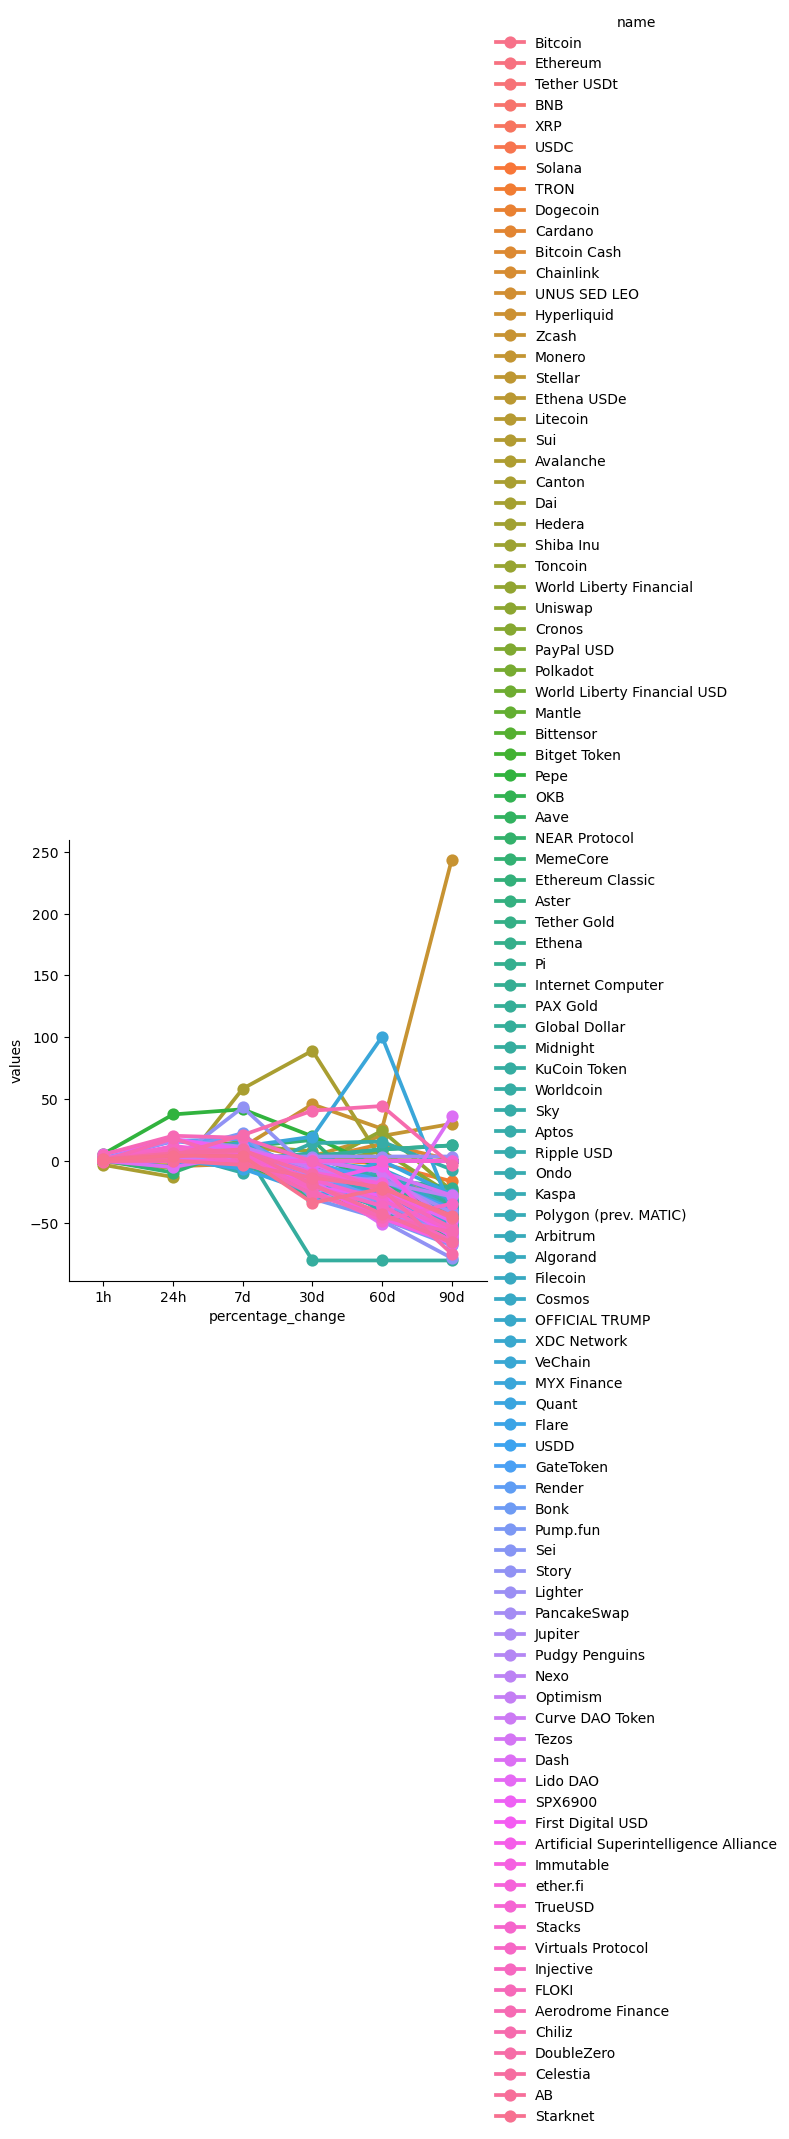

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.catplot(x='percentage_change', y= 'values', hue='name', data=df8, kind='point')